In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv("marketing_campaign.xls",sep='\t')
data.Dt_Customer = pd.to_datetime(data.Dt_Customer,format="%d-%m-%Y")
data.insert(2,"Age",2024-data.Year_Birth)
data["Marital_Status"] = data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
data = data.dropna()
data.insert(6,"Spent",data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"])
data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,67,Graduation,Alone,58138.0,1617,0,0,2012-09-04,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,70,Graduation,Alone,46344.0,27,1,1,2014-03-08,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,59,Graduation,Partner,71613.0,776,0,0,2013-08-21,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,40,Graduation,Partner,26646.0,53,1,0,2014-02-10,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,43,PhD,Partner,58293.0,422,1,0,2014-01-19,...,5,0,0,0,0,0,0,3,11,0


(array([ 10.,  18.,  33.,  58.,  68.,  70.,  85.,  77., 129., 141., 152.,
        150., 161., 121.,  94., 115., 123.,  99.,  93., 103.,  84.,  94.,
         59.,  37.,  24.,  13.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   1.,   0.,   1.]),
 array([ 28.  ,  30.06,  32.12,  34.18,  36.24,  38.3 ,  40.36,  42.42,
         44.48,  46.54,  48.6 ,  50.66,  52.72,  54.78,  56.84,  58.9 ,
         60.96,  63.02,  65.08,  67.14,  69.2 ,  71.26,  73.32,  75.38,
         77.44,  79.5 ,  81.56,  83.62,  85.68,  87.74,  89.8 ,  91.86,
         93.92,  95.98,  98.04, 100.1 , 102.16, 104.22, 106.28, 108.34,
        110.4 , 112.46, 114.52, 116.58, 118.64, 120.7 , 122.76, 124.82,
        126.88, 128.94, 131.  ]),
 <BarContainer object of 50 artists>)

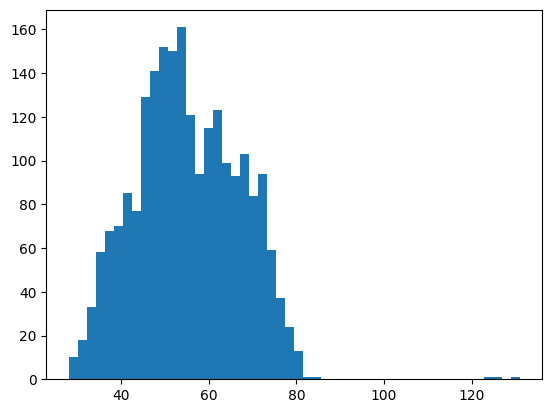

In [3]:
plt.hist(data.Age,bins=50)

In [4]:
data = data[data.Age < 100]

In [5]:
mean_age = data.Age.mean()
median_age = data.Age.median()
std_age = data.Age.std()
print("Media: " + str(mean_age))
print("Mediana: " + str(median_age))
print("Standard deviation: " + str(std_age))

Media: 55.082693176683236
Mediana: 54.0
Standard deviation: 11.70021612968385


(array([ 24.,  28., 101., 175., 220., 233., 224., 210., 206., 231., 199.,
        190., 108.,  43.,   8.,   4.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.,   5.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  1730.  ,   8379.36,  15028.72,  21678.08,  28327.44,  34976.8 ,
         41626.16,  48275.52,  54924.88,  61574.24,  68223.6 ,  74872.96,
         81522.32,  88171.68,  94821.04, 101470.4 , 108119.76, 114769.12,
        121418.48, 128067.84, 134717.2 , 141366.56, 148015.92, 154665.28,
        161314.64, 167

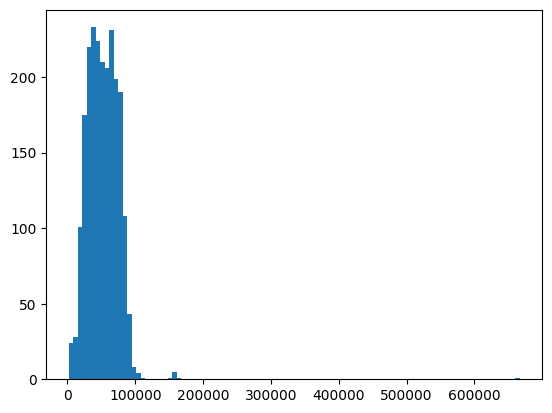

In [6]:
plt.hist(data.Income,bins=100)

In [7]:
data = data[data.Income < 600000]

In [8]:
mean_income = data.Income.mean()
median_income = data.Income.median()
std_income = data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 51958.81057866185
Mediana: 51371.0
Standard deviation: 21527.278844050485


In [14]:
counts_edu = data.Education.value_counts()
print(counts_edu)

Education
Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: count, dtype: int64


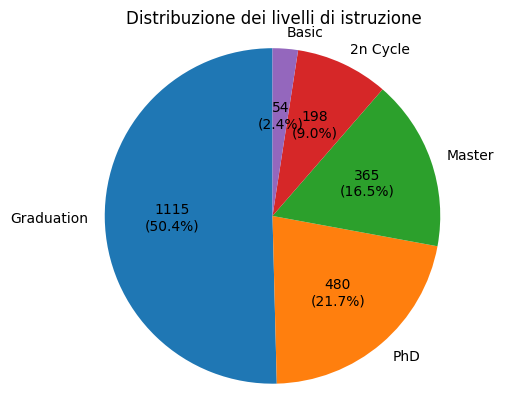

In [22]:
total = counts_edu.sum()

# Funzione per mostrare sia i conteggi che le percentuali
def autopct(pct):
    count = int(round(pct * total / 100))
    return f'{count}\n({pct:.1f}%)'
plt.pie(counts_edu, labels=counts_edu.index, autopct=autopct, startangle=90)
plt.axis('equal')
plt.title('Distribuzione dei livelli di istruzione')
plt.show()

In [16]:
counts_status = data.Marital_Status.value_counts()
print(counts_status)

Marital_Status
Partner    1428
Alone       784
Name: count, dtype: int64


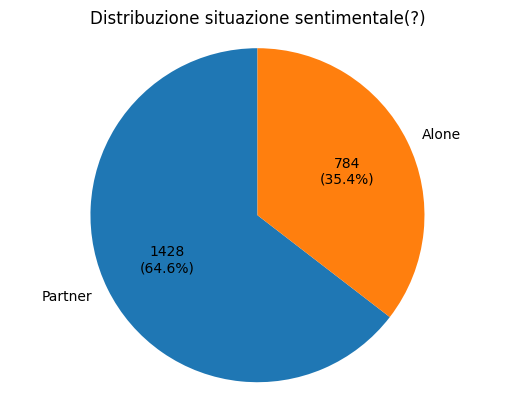

In [21]:
total = counts_status.sum()

# Funzione per mostrare sia i conteggi che le percentuali
def autopct(pct):
    count = int(round(pct * total / 100))
    return f'{count}\n({pct:.1f}%)'
plt.pie(counts_status, labels=counts_status.index, autopct=autopct, startangle=90)
plt.axis('equal')
plt.title('Distribuzione situazione sentimentale(?)')
plt.show()

In [35]:
phd_data = data.loc[data.Education== 'PhD']
phd_data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
4,5324,1981,43,PhD,Partner,58293.0,422,1,0,2014-01-19,...,5,0,0,0,0,0,0,3,11,0
7,6177,1985,39,PhD,Partner,33454.0,169,1,0,2013-05-08,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,50,PhD,Partner,30351.0,46,1,0,2013-06-06,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,74,PhD,Partner,5648.0,49,1,1,2014-03-13,...,20,1,0,0,0,0,0,3,11,0
15,2114,1946,78,PhD,Alone,82800.0,1315,0,0,2012-11-24,...,3,0,0,1,1,0,0,3,11,1


(array([ 1.,  3.,  0.,  0.,  0.,  0.,  1.,  1.,  2.,  1.,  1.,  2.,  3.,
         3.,  5.,  6., 10., 10., 15., 10., 17., 21.,  8., 13., 10.,  8.,
        18.,  6., 15., 15., 14., 16., 18., 14., 10., 12., 11., 13., 15.,
        13., 16., 21.,  7.,  7.,  8.,  7., 12.,  9.,  7., 11., 10.,  5.,
         7.,  0.,  2.,  2.,  1.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  1.]),
 array([  4023.  ,   5606.74,   7190.48,   8774.22,  10357.96,  11941.7 ,
         13525.44,  15109.18,  16692.92,  18276.66,  19860.4 ,  21444.14,
         23027.88,  24611.62,  26195.36,  27779.1 ,  29362.84,  30946.58,
         32530.32,  34114.06,  35697.8 ,  37281.54,  38865.28,  40449.02,
         42032.76,  43616.5 ,  45200.24,  46783.98,  48367.72,  49951.46,
         51535.2 ,  53118.94,  54702.68,  56286.42,  57870.16,  

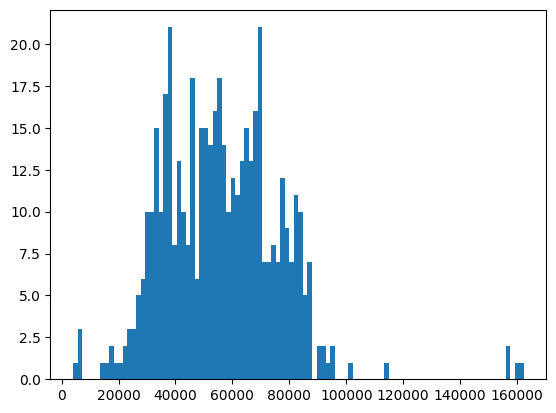

In [45]:
plt.hist(phd_data.Income,bins=100)

In [40]:
mean_income = phd_data.Income.mean()
median_income = phd_data.Income.median()
std_income = phd_data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 56145.31392931393
Mediana: 55212.0
Standard deviation: 20612.9799970187


In [36]:
basic_data = data.loc[data.Education== 'Basic']
basic_data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
11,387,1976,48,Basic,Partner,7500.0,61,0,0,2012-11-13,...,8,0,0,0,0,0,0,3,11,0
105,8373,1979,45,Basic,Partner,24594.0,29,1,0,2013-12-10,...,5,0,0,0,0,0,0,3,11,0
136,5342,1976,48,Basic,Alone,9548.0,29,1,0,2012-08-08,...,8,0,0,0,0,0,0,3,11,0
184,2563,1961,63,Basic,Partner,28249.0,43,0,0,2014-06-15,...,6,0,0,0,0,0,0,3,11,0
190,9733,1978,46,Basic,Partner,24882.0,80,1,0,2012-09-09,...,6,1,0,0,0,0,0,3,11,0


(array([2., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 3., 2., 0., 0., 3., 1., 1.,
        0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 3., 0., 0., 1.,
        0., 0., 0., 1., 1., 2., 0., 0., 1., 1., 0., 2., 3., 2., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 7500.  ,  7769.45,  8038.9 ,  8308.35,  8577.8 ,  8847.25,
         9116.7 ,  9386.15,  9655.6 ,  9925.05, 10194.5 , 10463.95,
        10733.4 , 11002.85, 11272.3 , 11541.75, 11811.2 , 12080.65,
        12350.1 , 12619.55, 12889.  , 13158.45, 13427.9 , 13697.35,
        13966.8 , 14236.25, 14505.7 , 14775.15, 15044.6 , 15314.05,
        15583.5 , 15852.95, 16122.4 , 16391.85, 16661.3 , 16930.75,
        17200.2 , 17469.65, 17739.1 , 18008.55, 18278.  , 18547.45,
        18816.9 , 19086.35, 19355.8 , 19625.25, 19894.7 , 20164.15,
      

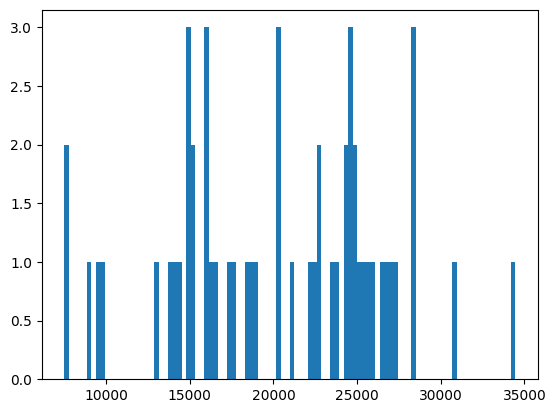

In [55]:
plt.hist(basic_data.Income,bins=100)

In [41]:
mean_income = basic_data.Income.mean()
median_income = basic_data.Income.median()
std_income = basic_data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 20306.25925925926
Mediana: 20744.0
Standard deviation: 6235.066773288437


In [37]:
graduation_data = data.loc[data.Education== 'Graduation']
graduation_data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,67,Graduation,Alone,58138.0,1617,0,0,2012-09-04,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,70,Graduation,Alone,46344.0,27,1,1,2014-03-08,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,59,Graduation,Partner,71613.0,776,0,0,2013-08-21,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,40,Graduation,Partner,26646.0,53,1,0,2014-02-10,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,53,Graduation,Alone,55635.0,590,0,1,2012-11-13,...,6,0,0,0,0,0,0,3,11,0


(array([ 12.,   8.,  53.,  94., 119., 111., 108.,  94., 104., 106., 119.,
        107.,  49.,  23.,   3.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  1730.  ,   8379.36,  15028.72,  21678.08,  28327.44,  34976.8 ,
         41626.16,  48275.52,  54924.88,  61574.24,  68223.6 ,  74872.96,
         81522.32,  88171.68,  94821.04, 101470.4 , 108119.76, 114769.12,
        121418.48, 128067.84, 134717.2 , 141366.56, 148015.92, 154665.28,
        161314.64, 167

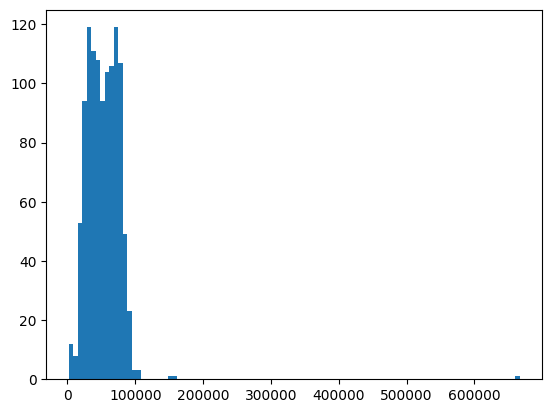

In [47]:
plt.hist(graduation_data.Income,bins=100)

In [60]:
graduation_data = graduation_data[graduation_data.Income < 600000]

In [61]:
mean_income = graduation_data.Income.mean()
median_income = graduation_data.Income.median()
std_income = graduation_data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 52169.74977578475
Mediana: 51983.0
Standard deviation: 21354.316952362668


In [38]:
cycle_data = data.loc[data.Education== '2n Cycle']
cycle_data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
19,2278,1985,39,2n Cycle,Alone,33812.0,133,1,0,2012-11-03,...,6,0,0,0,0,0,0,3,11,0
37,10755,1976,48,2n Cycle,Partner,23718.0,81,1,0,2013-09-02,...,7,0,0,0,0,0,0,3,11,0
46,9909,1996,28,2n Cycle,Partner,7500.0,122,0,0,2012-11-09,...,9,0,0,0,0,0,0,3,11,1
67,9369,1979,45,2n Cycle,Alone,88194.0,1274,0,1,2014-03-19,...,5,1,0,0,1,0,0,3,11,1
78,10401,1976,48,2n Cycle,Partner,26326.0,18,0,0,2013-09-04,...,3,0,0,0,0,0,1,3,11,0


(array([4., 0., 0., 1., 1., 1., 1., 1., 3., 2., 2., 0., 0., 2., 4., 2., 2.,
        4., 5., 4., 3., 8., 1., 1., 0., 1., 6., 5., 1., 1., 1., 5., 4., 3.,
        1., 4., 0., 1., 5., 3., 0., 0., 1., 4., 6., 3., 2., 2., 3., 1., 3.,
        3., 4., 0., 1., 2., 1., 4., 2., 3., 1., 2., 4., 3., 2., 3., 2., 3.,
        1., 1., 0., 5., 0., 2., 1., 2., 4., 1., 1., 4., 0., 1., 3., 3., 4.,
        1., 0., 2., 0., 2., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.]),
 array([ 7500.  ,  8390.47,  9280.94, 10171.41, 11061.88, 11952.35,
        12842.82, 13733.29, 14623.76, 15514.23, 16404.7 , 17295.17,
        18185.64, 19076.11, 19966.58, 20857.05, 21747.52, 22637.99,
        23528.46, 24418.93, 25309.4 , 26199.87, 27090.34, 27980.81,
        28871.28, 29761.75, 30652.22, 31542.69, 32433.16, 33323.63,
        34214.1 , 35104.57, 35995.04, 36885.51, 37775.98, 38666.45,
        39556.92, 40447.39, 41337.86, 42228.33, 43118.8 , 44009.27,
        44899.74, 45790.21, 46680.68, 47571.15, 48461.62, 49352.09,
      

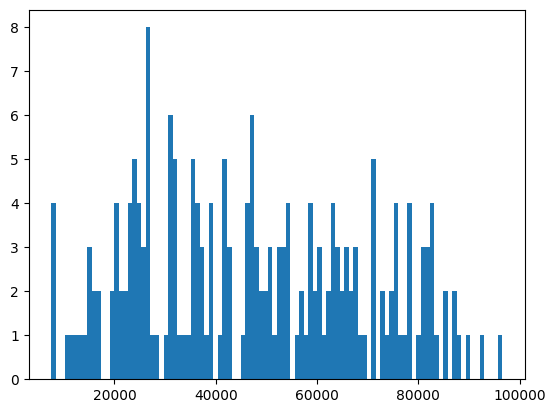

In [48]:
plt.hist(cycle_data.Income,bins=100)

In [43]:
mean_income = cycle_data.Income.mean()
median_income = cycle_data.Income.median()
std_income = cycle_data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 47633.19
Mediana: 46805.0
Standard deviation: 22119.08183787594


In [39]:
master_data = data.loc[data.Education== 'Master']
master_data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
5,7446,1967,57,Master,Partner,62513.0,716,0,1,2013-09-09,...,6,0,0,0,0,0,0,3,11,0
13,8180,1952,72,Master,Alone,59354.0,310,1,1,2013-11-15,...,6,0,0,0,0,0,0,3,11,0
18,6565,1949,75,Master,Partner,76995.0,1782,0,1,2013-03-28,...,5,0,0,0,1,0,0,3,11,0
30,6864,1989,35,Master,Alone,10979.0,30,0,0,2014-05-22,...,5,0,0,0,0,0,0,3,11,0
31,3033,1963,61,Master,Partner,38620.0,318,0,0,2013-05-11,...,3,0,0,0,0,0,0,3,11,0


(array([ 2.,  1.,  2.,  0.,  0.,  1.,  1.,  4.,  3.,  4.,  4.,  3.,  0.,
         8.,  4., 10.,  4., 13.,  8., 14., 10., 10.,  7., 12., 12., 11.,
        14.,  5., 14.,  8.,  6.,  7.,  8.,  9., 13.,  3.,  7., 15., 11.,
         9.,  5.,  4.,  8.,  3.,  6.,  9.,  5.,  8.,  7.,  7.,  5.,  3.,
         2.,  1.,  4.,  5.,  2.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  6560.  ,   8071.73,   9583.46,  11095.19,  12606.92,  14118.65,
         15630.38,  17142.11,  18653.84,  20165.57,  21677.3 ,  23189.03,
         24700.76,  26212.49,  27724.22,  29235.95,  30747.68,  32259.41,
         33771.14,  35282.87,  36794.6 ,  38306.33,  39818.06,  41329.79,
         42841.52,  44353.25,  45864.98,  47376.71,  48888.44,  50400.17,
         51911.9 ,  53423.63,  54935.36,  56447.09,  57958.82,  

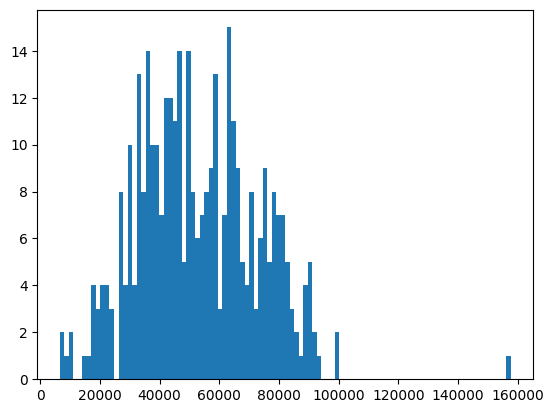

In [49]:
plt.hist(master_data.Income,bins=100)

In [44]:
mean_income = master_data.Income.mean()
median_income = master_data.Income.median()
std_income = master_data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 52917.53424657534
Mediana: 50943.0
Standard deviation: 20157.78802913486


(array([ 2.,  2.,  2.,  5.,  2.,  2.,  1.,  4.,  5.,  7., 16., 16., 11.,
        33., 17., 19., 21., 24., 32., 16., 28., 33., 25., 32., 26., 26.,
        31., 27., 18., 22., 19., 26., 17., 27., 21., 23., 26., 21., 28.,
        27., 27., 23., 23., 26., 34., 37., 17., 30., 22., 16., 32., 19.,
        16., 10.,  9.,  5.,  5.,  6.,  5.,  5.,  1.,  2.,  0.,  0.,  2.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([  1730.  ,   3284.16,   4838.32,   6392.48,   7946.64,   9500.8 ,
         11054.96,  12609.12,  14163.28,  15717.44,  17271.6 ,  18825.76,
         20379.92,  21934.08,  23488.24,  25042.4 ,  26596.56,  28150.72,
         29704.88,  31259.04,  32813.2 ,  34367.36,  35921.52,  37475.68,
         39029.84,  40584.  ,  42138.16,  43692.32,  45246.48,  46800.64,
         48354.8 ,  49908.96,  51463.12,  53017.28,  54571.44,  

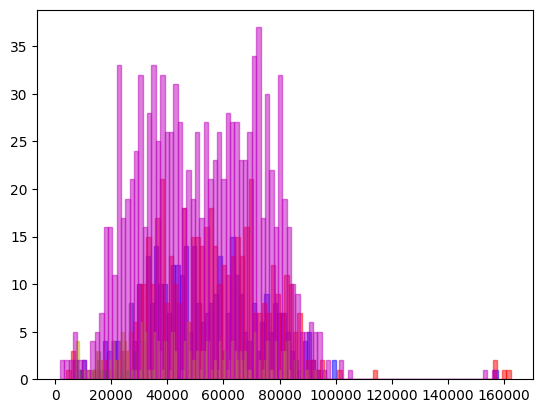

In [65]:
plt.hist(master_data.Income, bins=100, alpha=0.5, color='b', edgecolor='b')  # Blu
plt.hist(phd_data.Income, bins=100, alpha=0.5, color='r', edgecolor='r')  # Rosso
plt.hist(basic_data.Income, bins=100, alpha=0.5, color='g', edgecolor='g')  # Verde
plt.hist(cycle_data.Income, bins=100, alpha=0.5, color='y', edgecolor='y')  # Giallo
plt.hist(graduation_data.Income, bins=100, alpha=0.5, color='m', edgecolor='m')  # Magenta